In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_space(points,width):
    ls = []
    for x in range(0,points):
        a = [random.randrange(1,width+1),random.randrange(1,width+1)] #you need to make it so that it doesnt generate two on the same spot
        ls.append(a)
    return (np.array(ls))

In [3]:
def plot(coordinates):
    xs = []
    ys = []
    for x in coordinates:
        xs.append(x[0]) #doesnt really matter which you take as x and which you take as y
        ys.append(x[1])
    plt.scatter(xs,ys)
    for i,ğ in enumerate(coordinates):
        #plt.annotate(i,(xs[i],ys[i]))
        plt.annotate(f"{i} ({xs[i]},{ys[i]})",(xs[i],ys[i]))
    plt.gcf().set_size_inches(10, 10)
    plt.show()

In [4]:
def check(space,individual):
    total = 0
    
    for i,x1 in enumerate(individual):
        if i+1<len(individual):
            current = (space[x1])
            next_ = space[individual[i+1]]
            distance = np.linalg.norm((current-next_))
            total+=distance             
    
    return total

In [5]:
def generate_population(amount,points):
    population = np.arange(points)
    for individual in range(amount-1):
        a = np.arange(points)
        np.random.shuffle(a)
        population = np.vstack((population,a))
    return population

In [16]:
def generate_pc(cities,width,individuals):
    coordinates = generate_space(cities,width)
    population = generate_population(individuals,cities)
    return coordinates,population

In [26]:
def variation(population,conditions,optional=None):
    
    if conditions=="shuffle":
        mom = population[0]
        length = len(mom)
        crossover_point = np.random.randint(0,length-1)
        m_piece1 = mom[crossover_point:length]
        m_piece2 = mom[0:crossover_point]
        
        d_piece1=[]
        d_piece2=[]
        
        for x in m_piece2:
            d_piece2.append(x)
        for x in m_piece1:
            d_piece1.append(x)
        
        d_piece1=np.array(d_piece1)
        d_piece2=np.array(d_piece2)
        
        np.random.shuffle(d_piece1)
        np.random.shuffle(d_piece2)
        
        a = [np.concatenate((d_piece2,m_piece1)),np.concatenate((m_piece2,d_piece1))]
                    
        return a
    
    elif conditions=="ordercrossover":
        mom = population[0]
        dad = population[1]
        length = len(mom)
        m_piece1 = mom[np.random.randint(0,length-1):length]
        
        for x in m_piece1:
            index = np.where(m_piece1 == x)
            index2 = np.where(dad == x)
            dad[index2] = dad[index]
            dad[index] = x
    
        return [dad]
    
    elif conditions=="partialcrossover":
        
        lsn = []
        for x in range(10):
            lsn.append((np.arange(12)))
        for x in ls:
            np.random.shuffle(x)
        
        print(ls[0])
        
        lsmm = []
        for x in ls:
            m1,m2,m3,m4 = np.hsplit(x,4)
            lsm = [m1,m2,m3,m4]
            lsmm.append(lsm)
        
        for x in lsmm:
            for y in x:
                print(y)
                print(check(coordinates,y))
    
    

In [27]:
def train(population,space,iterations,operation):
    history = []
    for iteration in range(iterations):
        
        total_distances = np.zeros(len(population))
        dc = {}
        for i,individual in enumerate(population):
            total_distance = check(space,individual)
            total_distances[i] = total_distance
            dc[total_distance] = i
        total_distances.sort()        
        
        ls = []
        for x in (total_distances):
            ls.append(population[dc.get(x)])
        population = np.array(ls)
        
        a = variation(population,operation)
        
        for i,x in enumerate(a): 
            population[-(i+1)]=a[i]
                
        if iteration%100==0:
            lowest = total_distances[0]
            print(f"Iteration {iteration} lowest distance: {lowest}")
            history.append(lowest)
            
    print(f"Shortest path found: {population[0]}, distance: {lowest}")
    return history

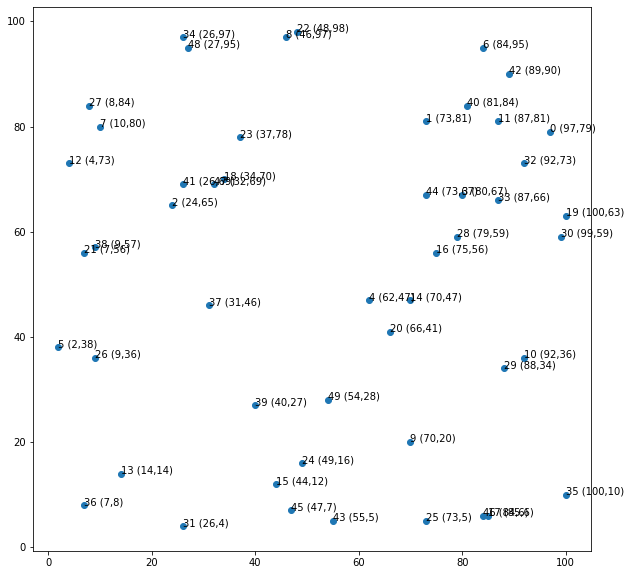

[11  8  3 42 17 34 33 16 44 20 43 26  6 40  4 27  7 32 41 10 28 13 36 30
 24 21 46 37 29  2 15 23 38  5  1 47 19 35 45 12 18 48 22 39 31  0 49 14
 25  9]


In [31]:
coordinates,population = generate_pc(50,100,10)
plot(coordinates)

In [29]:
history = train(population,coordinates,10000,"partialcrossover")

50


TypeError: 'NoneType' object is not iterable

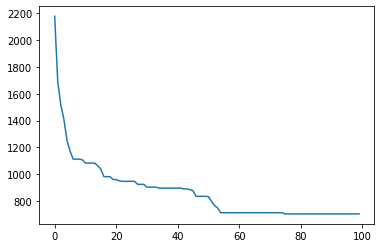

In [12]:
plt.plot(history)

In [134]:
parents = np.array([[1,2,3,4,5,6,7,8,9,10],[10,9,8,7,6,5,4,3,2,1]])
mom = parents[0]
dad = parents[1]
length = len(mom)
print(dad)
m_piece1 = mom[np.random.randint(0,length-1):length]

for x in m_piece1:
    index = np.where(m_piece1 == x)
    index2 = np.where(dad == x)
    dad[index2] = dad[index]
    dad[index] = x

print(m_piece1)
print(dad)


[10  9  8  7  6  5  4  3  2  1]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]


In [112]:
def check(space,individual):
    total = 0
    for i,x1 in enumerate(individual):
        if i+1<len(individual):
            current = (space[x1])
            next_ = space[individual[i+1]]
            distance = np.linalg.norm((current-next_))
            total+=distance
            
            print(current,next_,distance)
            
    return total

In [113]:
a = check(coordinates,np.array([1,2,3,0,4]))
#print(a)
#a = check(coordinates,np.array([2,0,1,3,4]))
#print(a)

[5 2] [3 6] 4.47213595499958
[3 6] [8 1] 7.0710678118654755
[8 1] [5 9] 8.54400374531753
[5 9] [9 5] 5.656854249492381


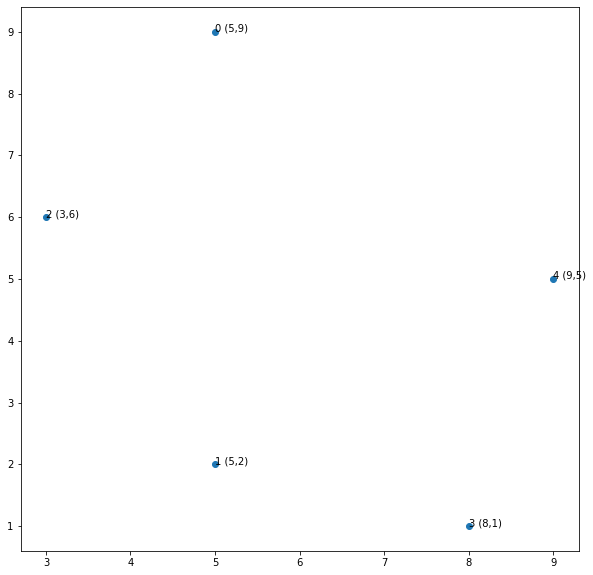

In [99]:
plot(coordinates)

In [57]:
ls = np.array([1,2,3,4,5,6,7])
dc = {}
for index,x in enumerate(ls):
    dc[str(x)]=index
print(dc)

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6}


In [58]:
x=np.arange(10)
a,b = np.hsplit(x,2)
print(a,b)

[0 1 2 3 4] [5 6 7 8 9]


In [56]:
ls = []
for x in range(10):
    ls.append((np.arange(12)))
for x in ls:
    np.random.shuffle(x)

print(ls[0])

lsmm = []
for x in ls:
    m1,m2,m3,m4 = np.hsplit(x,4)
    lsm = [m1,m2,m3,m4]
    lsmm.append(lsm)

for x in lsmm:
    for y in x:
        print(y)
        print(check(coordinates,y))

[ 7  5  4  9  0  8 10  2  6 11  1  3]
[7 5 4]
103.42636190133395
[9 0 8]
118.96778192199318
[10  2  6]
141.00767763809858
[11  1  3]
29.65247584249853
[8 5 4]
134.27151698709883
[3 6 0]
48.8997993755502
[ 9  7 11]
161.8593069750995
[10  1  2]
100.39279484271874
[9 8 2]
119.48655588361206
[11  4  6]
95.00341082179472
[1 5 3]
166.22260876325473
[ 7 10  0]
136.34884263688144
[10  6  9]
135.8353808272667
[4 3 8]
72.25038428916596
[7 1 0]
87.09112516567805
[ 2 11  5]
160.25754563287887
[ 7 11  9]
140.33105402866408
[ 8 10  4]
108.35335239699715
[0 6 2]
87.69756745308199
[5 3 1]
98.86906072796472
[8 6 1]
55.85708899564575
[10  9  2]
91.55354319025557
[11  7  3]
148.20340327802407
[4 0 5]
150.89342516350018
[10  7  2]
113.57740552173793
[5 1 4]
118.74116064819981
[3 9 6]
124.34753334778576
[ 0 11  8]
54.20940119651634
[5 4 0]
108.09486805398755
[11  3  7]
86.84938588780878
[ 6 10  1]
108.38660155369604
[2 8 9]
119.48655588361206
[ 8 10  0]
119.68998342348296
[6 4 9]
80.96177081043379
[1 3 7]


In [63]:
population = []
for x in range(10):
    population.append((np.arange(12)))
for individual in population:
    np.random.shuffle(individual)
    
print(population[0])

[ 8  2  9  5  7  3 11  4 10  1  6  0]
